<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r12_i1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-15-m-1-r12.csv?token=AKVFSOHA22D43W4EI7X4NYC63JFGI')
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-normal-n-0-15-r12.csv?token=AKVFSOG7434YOYMQFHD2A6S63JFHQ')


In [0]:
df = df1.append(df9, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [45]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,96,3,2,1,1,4,3,9,15,15,24,8,4,4,3,0.75,16,1,1,1,1,6,16,3,27,0
1,96,3,2,1,1,4,3,9,15,15,24,8,3,4,3,0.75,16,1,1,1,1,6,12,3,27,1
2,1126,3,2,1,1,4,3,9,15,15,20,4,34,5,3,0.60,16,11,1,11,11,6,136,3,27,0
3,1128,3,2,1,1,4,3,9,15,15,20,4,23,5,3,0.60,16,8,1,8,8,6,92,3,27,1
4,1235,0,2,1,1,4,3,9,15,15,28,12,37,3,3,1.00,16,10,2,11,20,0,148,3,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31857,3275216,2,0,6,4,2,3,10,28,12,27,11,30077,4,0,0.00,25,5,10,14,50,0,1443696,18,180,0
31858,3275223,2,0,6,5,3,3,10,28,12,27,11,30077,4,0,0.00,32,4,11,14,44,0,2706930,18,180,0
31859,3275224,2,0,2,1,4,3,11,28,12,27,11,30078,4,0,0.00,32,3,12,14,36,0,240624,6,66,0
31860,3275225,2,0,7,1,4,3,12,28,12,15,15,30077,3,0,0.00,5,2,13,14,26,0,842156,21,252,0


In [46]:
df.shape

(31862, 26)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-15-m-11-r12.csv?token=AKVFSODJ2VS24KRBYQIJD3S63JFGM')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-15-m-12-r12.csv?token=AKVFSOAQGBVPWTBK23STAH263JFYI')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-15-m-7-r12.csv?token=AKVFSOACXGKWQCFQJMZE7OK63JFYM')


In [48]:
print(df13.shape)
print(df14.shape)
print(df15.shape)

(17909, 26)
(78027, 26)
(17909, 26)


Processing

In [49]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [51]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.377043,0.195294,-0.007882,0.011204,NaN,0.101427,-0.080878,0.604288,-0.299114,-0.548714,-0.131989,-0.295432,0.003411,-0.228142,-0.162612,0.760612,0.001713,0.195294,0.202908,0.078017
inport,-0.377043,1.000000,-0.336202,-0.017087,0.024288,NaN,-0.634886,-0.032223,0.077625,0.946344,0.934444,0.427203,0.127968,-0.250638,-0.095837,-0.109498,0.287169,-0.121473,-0.336202,-0.492781,0.009243
cache_coherence_type,0.195294,-0.336202,1.000000,0.306430,-0.435577,NaN,-0.007141,0.038443,-0.007475,-0.366221,-0.373310,-0.561655,0.036908,-0.025766,0.008705,0.020464,-0.043039,0.330855,1.000000,0.956466,-0.004349
flit_id,-0.007882,-0.017087,0.306430,1.000000,-0.165034,NaN,-0.102775,0.016393,-0.001496,0.011803,0.025134,0.523118,0.029426,0.007540,0.028880,0.055463,0.004184,0.695739,0.306430,0.270058,0.000467
flit_type,0.011204,0.024288,-0.435577,-0.165034,1.000000,NaN,0.146091,-0.023302,0.002127,-0.016778,-0.035727,0.305413,-0.245553,0.197822,-0.037290,-0.041635,-0.005948,0.034662,-0.435577,-0.383877,-0.000664
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,0.101427,-0.634886,-0.007141,-0.102775,0.146091,NaN,1.000000,0.047666,-0.137503,-0.624074,-0.590256,-0.184655,-0.072906,0.227101,0.120465,0.127259,-0.350271,0.011613,-0.007141,0.275834,-0.035366
traversal_id,-0.080878,-0.032223,0.038443,0.016393,-0.023302,NaN,0.047666,1.000000,-0.058867,-0.027353,-0.011929,0.001210,0.168651,0.169292,0.264020,0.199491,-0.109892,0.513638,0.038443,0.049193,-0.356938
hop_count,0.604288,0.077625,-0.007475,-0.001496,0.002127,NaN,-0.137503,-0.058867,1.000000,0.222264,-0.166232,0.094756,-0.191042,-0.074823,-0.207709,-0.153985,0.664856,-0.035670,-0.007475,-0.052559,-0.038478
current_hop,-0.299114,0.946344,-0.366221,0.011803,-0.016778,NaN,-0.624074,-0.027353,0.222264,1.000000,0.914220,0.475352,0.115807,-0.249875,-0.104742,-0.116564,0.348149,-0.115447,-0.366221,-0.516531,-0.020404


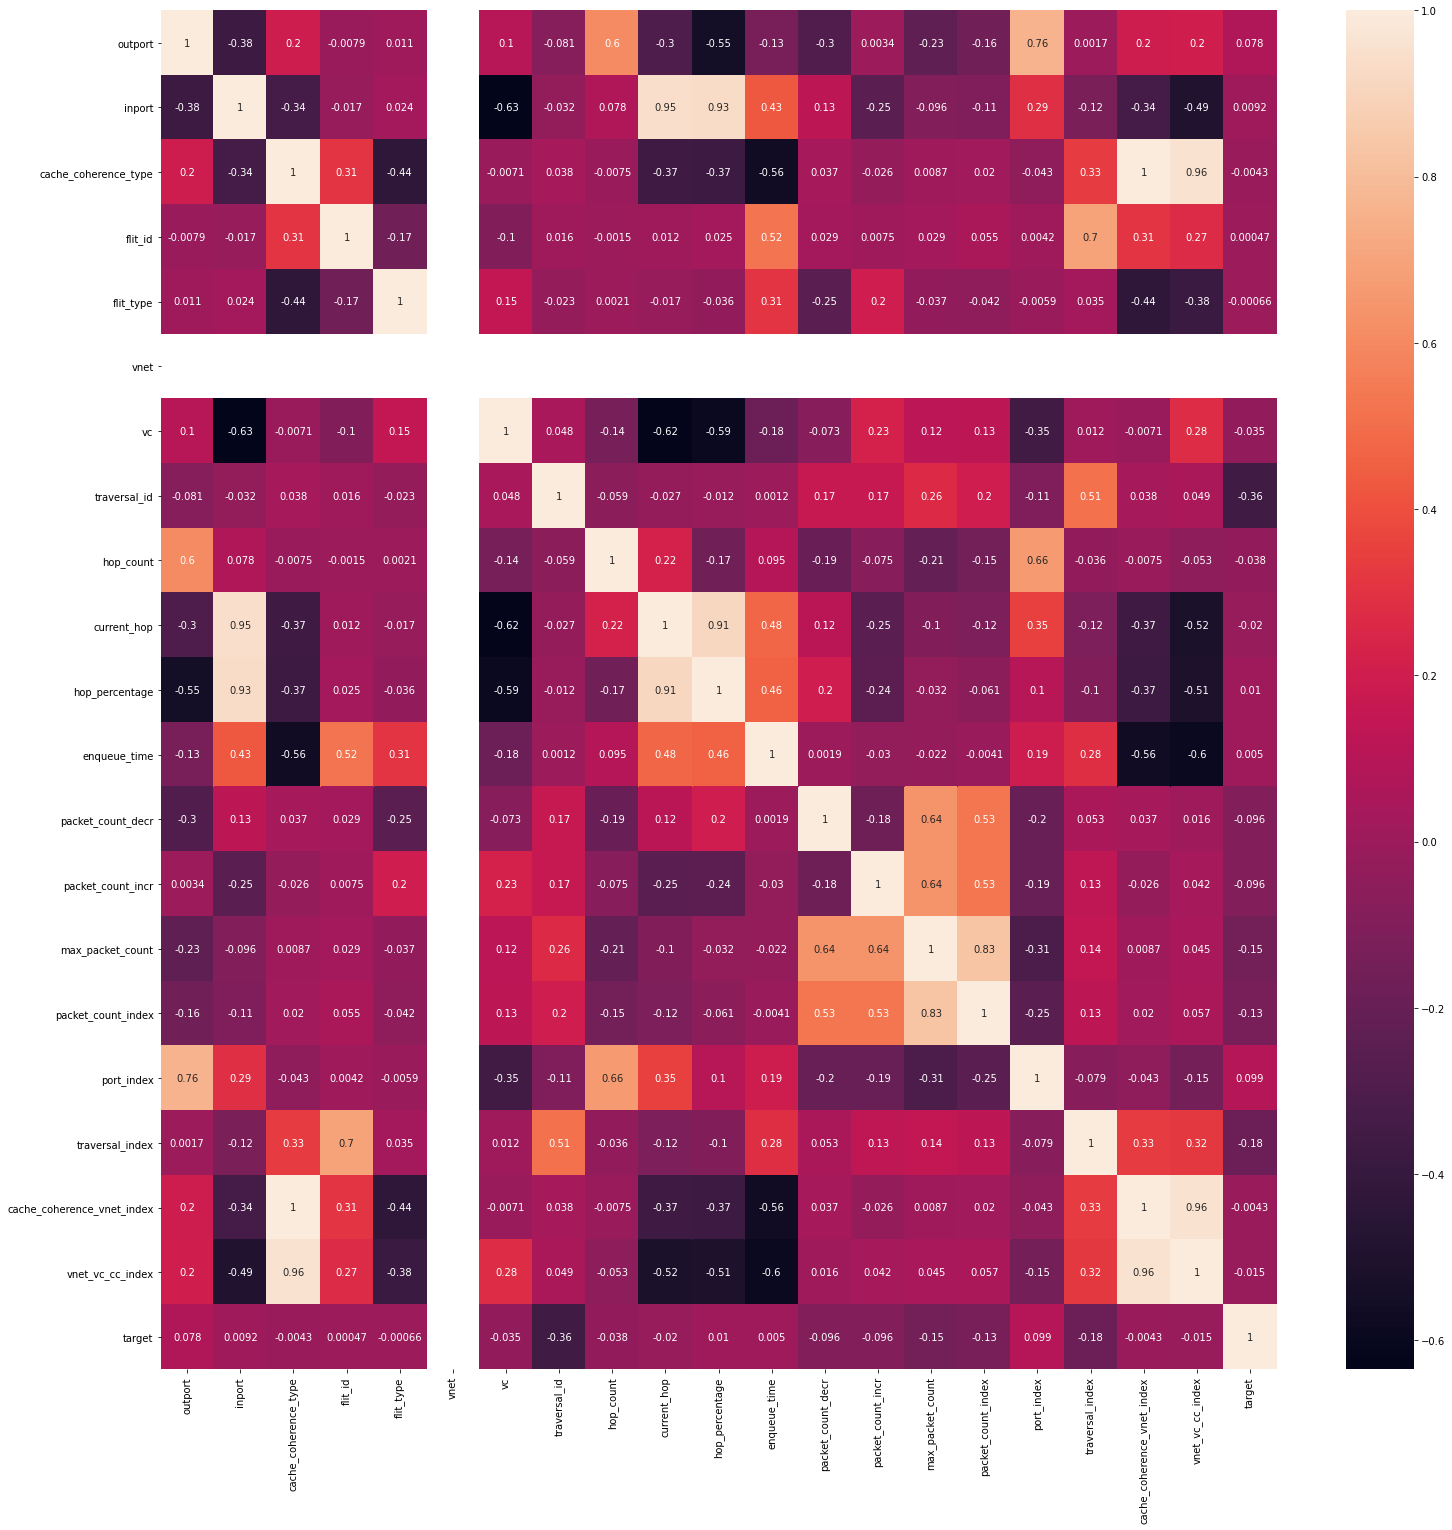

In [52]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [54]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['hop_percentage', 'inport', 'vnet_vc_cc_index', 'cache_coherence_type']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

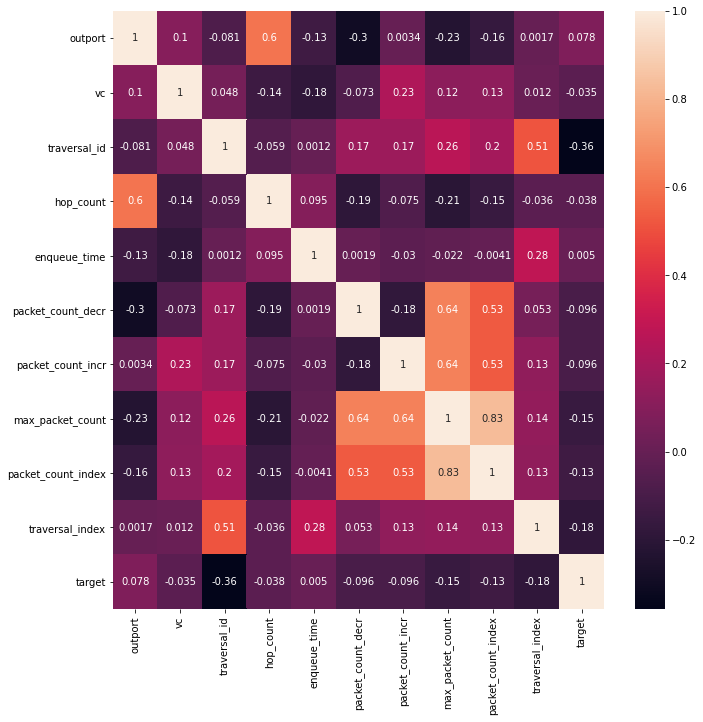

In [56]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

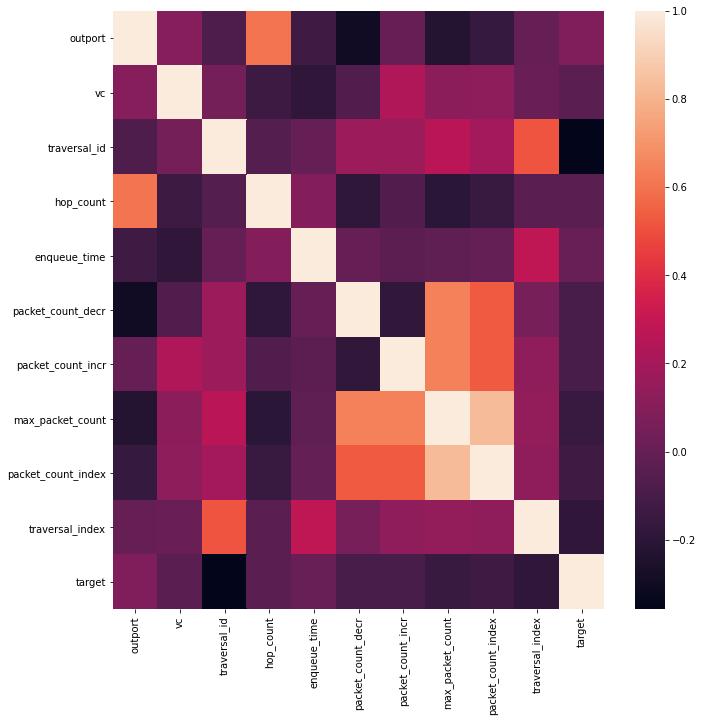

In [57]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [59]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,1.000000,0.000000,0.000033,0.333333,0.230769,0.000000,0.000000,0.000000,0.000000,0.000001
1,1.000000,0.000000,0.000000,0.333333,0.230769,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.000000,0.000000,0.001031,0.666667,0.230769,0.178571,0.000000,0.178571,0.011905,0.000046
3,1.000000,0.000000,0.000665,0.666667,0.230769,0.125000,0.000000,0.125000,0.008333,0.000030
4,0.000000,0.000000,0.001131,0.000000,0.230769,0.160714,0.017857,0.178571,0.022619,0.000050
...,...,...,...,...,...,...,...,...,...,...
31857,0.666667,0.333333,0.999967,0.333333,0.403846,0.071429,0.160714,0.232143,0.058333,0.533331
31858,0.666667,0.333333,0.999967,0.333333,0.538462,0.053571,0.178571,0.232143,0.051190,1.000000
31859,0.666667,0.666667,1.000000,0.333333,0.538462,0.035714,0.196429,0.232143,0.041667,0.088888
31860,0.666667,1.000000,0.999967,0.000000,0.019231,0.017857,0.214286,0.232143,0.029762,0.311108


In [60]:
train_X[train_X.duplicated()].shape

(1, 10)

In [61]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,1.000000,0.000000,0.000000,0.333333,0.214286,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.000000,0.000000,0.000998,0.666667,0.214286,0.172414,0.000000,0.172414,0.011123,0.000044
2,0.000000,0.000000,0.001031,0.333333,0.285714,0.155172,0.017241,0.172414,0.021135,0.000046
3,0.666667,0.000000,0.001031,0.333333,0.000000,0.137931,0.034483,0.172414,0.028921,0.000099
4,0.000000,0.000000,0.001031,0.333333,0.357143,0.120690,0.051724,0.172414,0.034483,0.000152
...,...,...,...,...,...,...,...,...,...,...
17904,0.666667,0.333333,0.999967,0.333333,0.375000,0.068966,0.258621,0.327586,0.087875,0.533330
17905,0.666667,0.333333,0.999967,0.333333,0.500000,0.051724,0.275862,0.327586,0.074527,1.000000
17906,0.666667,0.666667,1.000000,0.333333,0.500000,0.034483,0.293103,0.327586,0.058954,0.088885
17907,0.666667,1.000000,0.999967,0.000000,0.035714,0.017241,0.310345,0.327586,0.041157,0.311106


In [62]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [63]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Labels

1.   0 -  malicious
2.   1 -  good



In [65]:
train_Y = df['target']
train_Y.value_counts()

0    17909
1    13953
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.33, random_state=seed, shuffle=True)

Feature Selection

                Specs       Score
2        traversal_id  396.321034
9     traversal_index  143.812897
8  packet_count_index   59.644547
7    max_packet_count   59.225291
0             outport   42.429752
5   packet_count_decr   31.457824
6   packet_count_incr   27.829250
1                  vc   13.262654
3           hop_count    4.543554
4        enqueue_time    0.044303


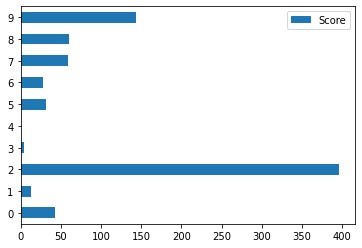

In [68]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [70]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r1.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [73]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 94.56129666932121
Test Prediction Score 90.54683785068949


In [74]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 79.13339661622648
Test Prediction Score 81.7768208440668
Test Prediction Score 77.48059634820481


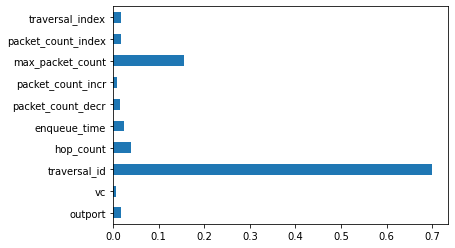

In [75]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

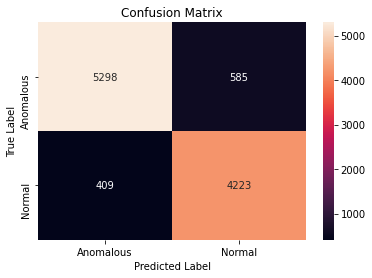

In [76]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [77]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      5883
           1       0.88      0.91      0.89      4632

    accuracy                           0.91     10515
   macro avg       0.90      0.91      0.90     10515
weighted avg       0.91      0.91      0.91     10515



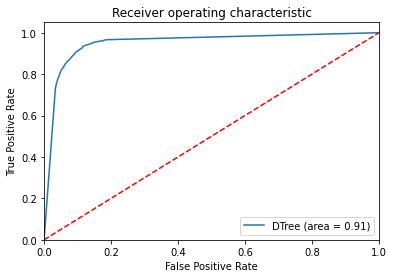

In [78]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [80]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r12l-i1.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [83]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.99531550100717
Test Prediction Score 97.46077032810271


In [84]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 80.56284549667765
Test Prediction Score 82.53425096440976
Test Prediction Score 78.13389915684851


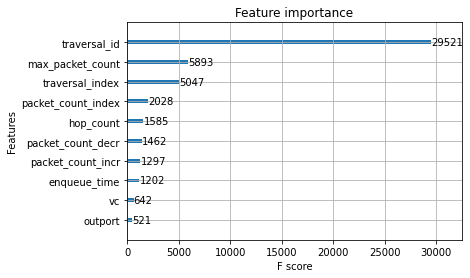

In [85]:
plot_importance(xgbc)
plt.show()

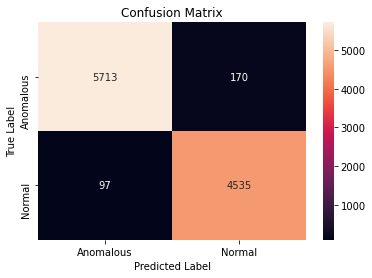

In [86]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [87]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      5883
           1       0.96      0.98      0.97      4632

    accuracy                           0.97     10515
   macro avg       0.97      0.98      0.97     10515
weighted avg       0.97      0.97      0.97     10515



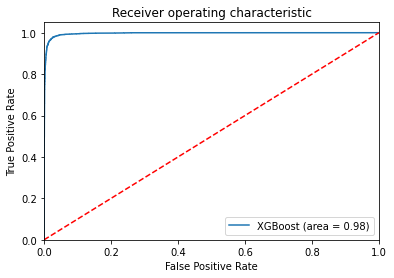

In [88]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()